In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


โหลด dataset

In [3]:
FILE_PATH = "/content/drive/MyDrive/Colab Notebooks/dataset/Employee_Attrition.csv"
df_ori = pd.read_csv(FILE_PATH)
df_ori.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df_ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# **Data Engineering**

##**Data Wragling**

In [ ]:
df_wrag = df_ori.copy()

ทำการ encode ข้อมูลที่เป็น Categorical แบบ 2 value เป็น Binary

เช่น Yes/No -> 1/0

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df_wrag["Attrition"] = label_encoder.fit_transform(df_wrag["Attrition"]) 
df_wrag["Gender"] = label_encoder.fit_transform(df_wrag["Gender"])
df_wrag["OverTime"] = label_encoder.fit_transform(df_wrag["OverTime"])

df_wrag[["Attrition", "Gender", "OverTime"]].head(5)

,Attrition,Gender,OverTime
0,1,0,1
1,0,1,0
2,1,1,1
3,0,0,1
4,0,1,0


ทำการ encode ข้อมูลที่เป็น ordinal data เป็นตัวเลข

In [ ]:
BusinessTravel_Dict = {"Travel_Frequently": 3,
                      "Travel_Rarely" : 2,
                      "Non-Travel" : 1}

df_wrag["Ordinal_BusinessTravel"] = df_wrag.BusinessTravel.map(BusinessTravel_Dict)
df_wrag.drop(["BusinessTravel"], axis=1, inplace=True)

df_wrag.head(5)

,Age,Attrition,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Ordinal_BusinessTravel
0,41,1,1102,Sales,1,2,Life Sciences,1,1,2,...,80,0,8,0,1,6,4,0,5,2
1,49,0,279,Research & Development,8,1,Life Sciences,1,2,3,...,80,1,10,3,3,10,7,1,7,3
2,37,1,1373,Research & Development,2,2,Other,1,4,4,...,80,0,7,3,3,0,0,0,0,2
3,33,0,1392,Research & Development,3,4,Life Sciences,1,5,4,...,80,0,8,3,3,8,7,3,0,3
4,27,0,591,Research & Development,2,1,Medical,1,7,1,...,80,1,6,3,3,2,2,2,2,2


ทำการ encode ข้อมูลที่เป็น categorical ที่มีค่ามากกว่า 3 ชนิด (Non-Binary) โดยมี Rule ในการ encode ดังนี้

1. หากจำนวน (count) ใน categorical data ไม่เท่ากันให้ใช้ Frequency Encoding
2. หากจำนวน (count) ใน categorical data เท่ากันให้ใช้ Target Encoding

ที่เหลือให้ทำ one-hot encoding

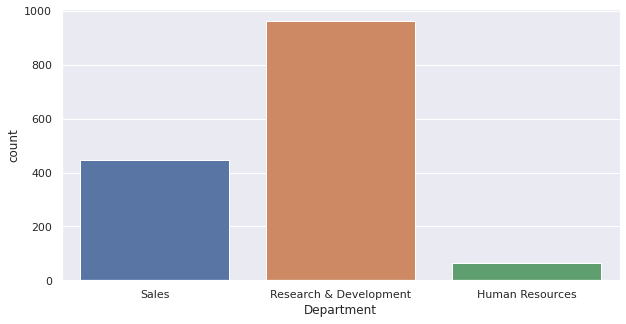

In [ ]:
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(x="Department", data=df_wrag)
plt.show()

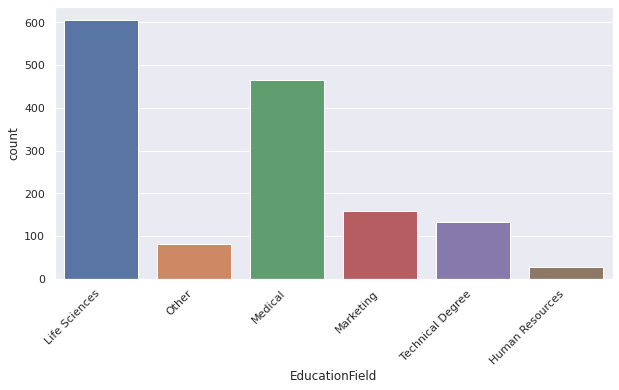

In [ ]:
chart = sns.countplot(x="EducationField", data=df_wrag)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

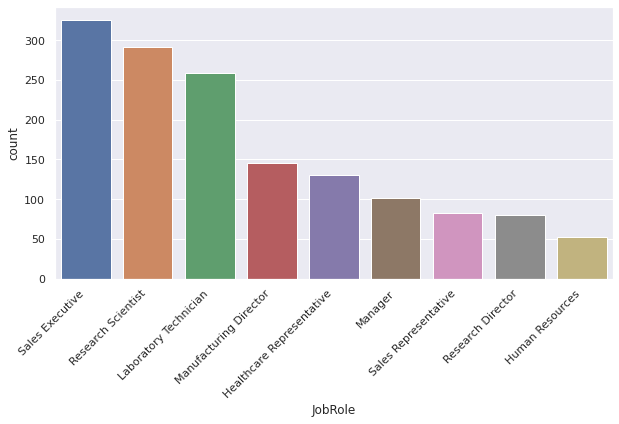

In [ ]:
chart = sns.countplot(x="JobRole", data=df_wrag)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

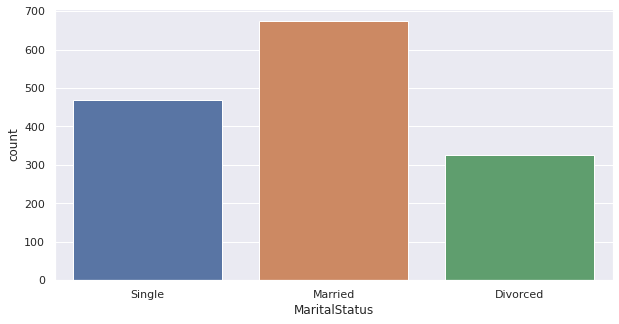

In [ ]:
sns.countplot(x="MaritalStatus", data=df_wrag)
plt.show()

ทำ one-hot encoding

In [ ]:
df_wrag = pd.get_dummies(df_wrag, columns=['Department', 'MaritalStatus'])
df_wrag.head(5)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,...,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Ordinal_BusinessTravel,Department_Human Resources,Department_Research & Development,Department_Sales,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,Life Sciences,1,1,2,0,...,4,0,5,2,0,0,1,0,0,1
1,49,0,279,8,1,Life Sciences,1,2,3,1,...,7,1,7,3,0,1,0,0,1,0
2,37,1,1373,2,2,Other,1,4,4,1,...,0,0,0,2,0,1,0,0,0,1
3,33,0,1392,3,4,Life Sciences,1,5,4,0,...,7,3,0,3,0,1,0,0,1,0
4,27,0,591,2,1,Medical,1,7,1,1,...,2,2,2,2,0,1,0,0,1,0


ทำ frequency encoding

In [ ]:
df_wrag["EducationField"] = df_wrag["EducationField"].map(df_wrag["EducationField"].value_counts())
df_wrag["JobRole"] = df_wrag["JobRole"].map(df_wrag["JobRole"].value_counts())

df_wrag[["EducationField", "JobRole"]]

,EducationField,JobRole
0,606,326
1,606,292
2,82,259
3,606,292
4,464,259
...,...,...
1465,464,259
1466,464,131
1467,606,145
1468,464,326


##**Data Cleasing**

In [ ]:
df_clean = df_wrag.copy()

1. Check null

In [ ]:
print(df_clean.columns[df_clean.isnull().any()], "\n")
print(df_clean[df_clean.isnull().any(axis=1)])

Index([], dtype='object') 

Empty DataFrame
Columns: [Age, Attrition, DailyRate, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Ordinal_BusinessTravel, Department_Human Resources, Department_Research & Development, Department_Sales, MaritalStatus_Divorced, MaritalStatus_Married, MaritalStatus_Single]
Index: []

[0 rows x 39 columns]


2. Drop nondistinctive and non-meaning columns

In [ ]:
df_clean.drop(["EmployeeNumber"], axis=1, inplace=True)
df_clean.drop([i for i in df_clean.columns if len(df_clean[i].unique()) == 1], axis=1, inplace = True)

3. Check outliers

In [ ]:
df_num = ["Age", "DailyRate", "DistanceFromHome", "HourlyRate", "MonthlyIncome",
          "MonthlyRate", "NumCompaniesWorked", "PercentSalaryHike", "TotalWorkingYears",
          "TrainingTimesLastYear", "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion",
          "YearsWithCurrManager"]

ทำการ visualize numerical data ด้วย box plot เพื่อหา outlier

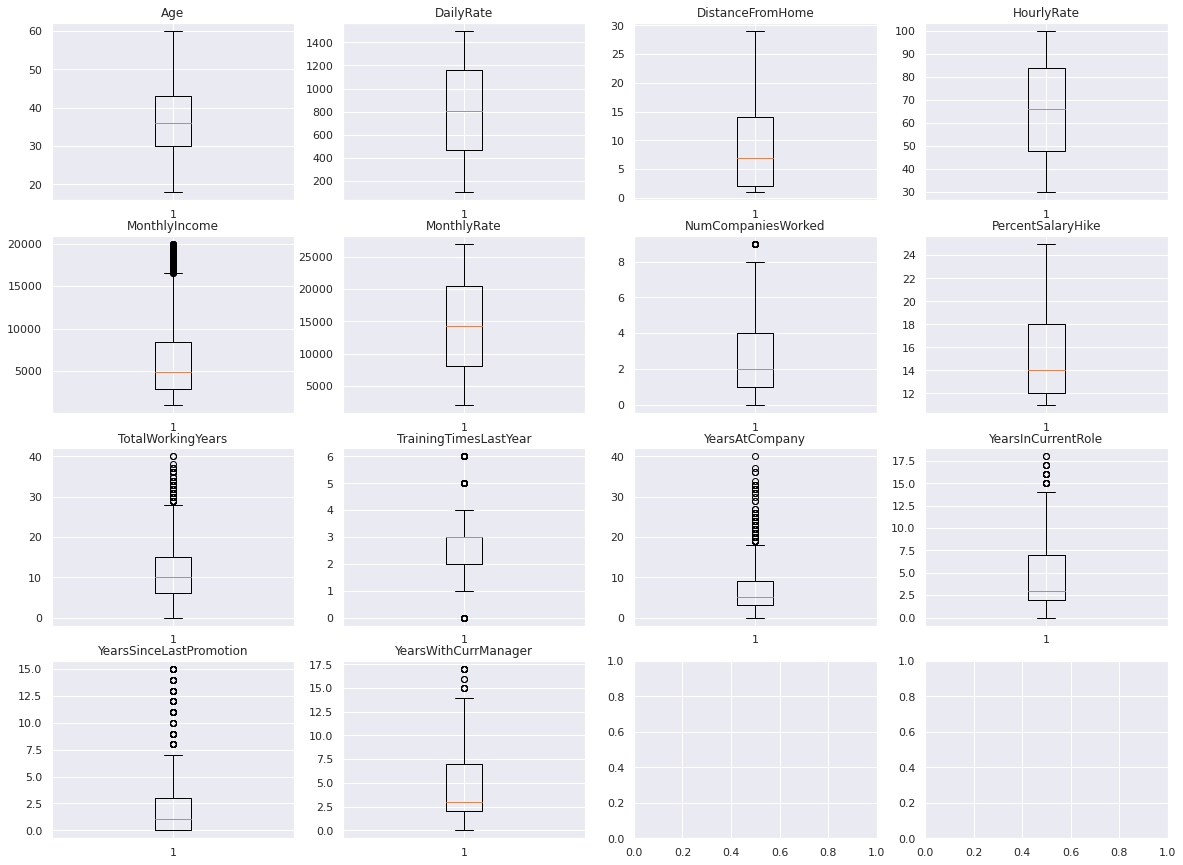

In [ ]:
fig, axs = plt.subplots(4, 4, figsize =(20,15))

cnt = 0
for i in range(4):
  for j in range(4):
    if cnt == 14:
      break
    axs[i, j].boxplot(df_clean[df_num[cnt]])
    axs[i, j].set_title(df_num[cnt])
    cnt = cnt + 1

ทำการกำจัด outlier ด้วยเทคนิค Quantile based flooring and capping

In [ ]:
df_num_out = ["MonthlyIncome", "NumCompaniesWorked", "TotalWorkingYears", 
              "TrainingTimesLastYear", "YearsAtCompany", "YearsInCurrentRole",
              "YearsSinceLastPromotion","YearsWithCurrManager"]

In [ ]:
for i in df_num_out:
  tenth_q = df_clean[i].quantile(0.10)
  ninth_q = df_clean[i].quantile(0.90)
  df_clean[i] = np.where(df_clean[i] < tenth_q, tenth_q, df_clean[i])
  df_clean[i] = np.where(df_clean[i] > ninth_q, ninth_q, df_clean[i])

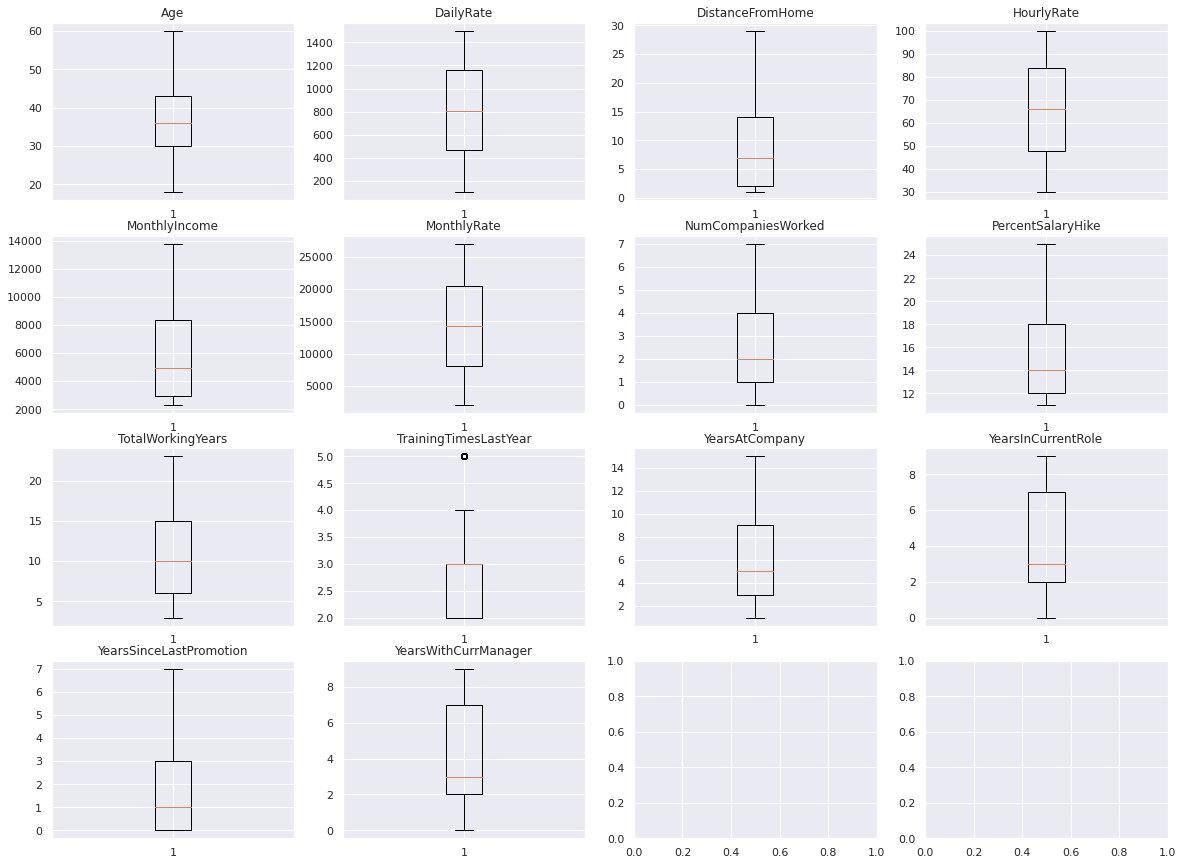

In [ ]:
fig, axs = plt.subplots(4, 4, figsize =(20,15))

cnt = 0
for i in range(4):
  for j in range(4):
    if cnt == 14:
      break
    axs[i, j].boxplot(df_clean[df_num[cnt]])
    axs[i, j].set_title(df_num[cnt])
    cnt = cnt + 1

In [ ]:
df_clean.head(5)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Ordinal_BusinessTravel,Department_Human Resources,Department_Research & Development,Department_Sales,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,606,2,0,94,3,...,4.0,0.0,5.0,2,0,0,1,0,0,1
1,49,0,279,8,1,606,3,1,61,2,...,7.0,1.0,7.0,3,0,1,0,0,1,0
2,37,1,1373,2,2,82,4,1,92,2,...,0.0,0.0,0.0,2,0,1,0,0,0,1
3,33,0,1392,3,4,606,4,0,56,3,...,7.0,3.0,0.0,3,0,1,0,0,1,0
4,27,0,591,2,1,464,1,1,40,3,...,2.0,2.0,2.0,2,0,1,0,0,1,0


##**Data Preprocessing**

เช็คการกระจายของ target variable (Attrition) ปรากฎว่าเป็น imbalance dataset จึงทำการปรับแก้ด้วยการใช้ SMOTE

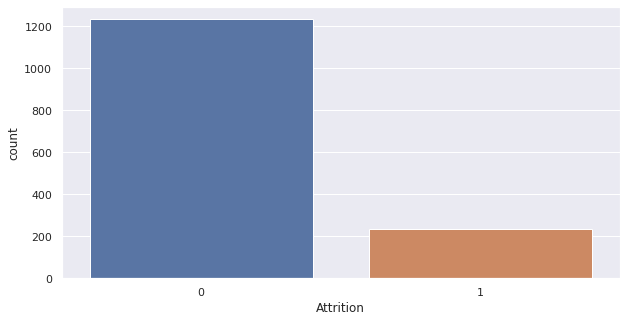

In [ ]:
sns.countplot(x="Attrition", data=df_clean)
plt.show()

In [ ]:
!pip install imbalanced-learn

In [ ]:
df_model = df_clean.copy()
X = df_model.drop('Attrition', axis=1)
y = df_model['Attrition']

เช็คการกระจายของ target variable หลังทำ SMOTE

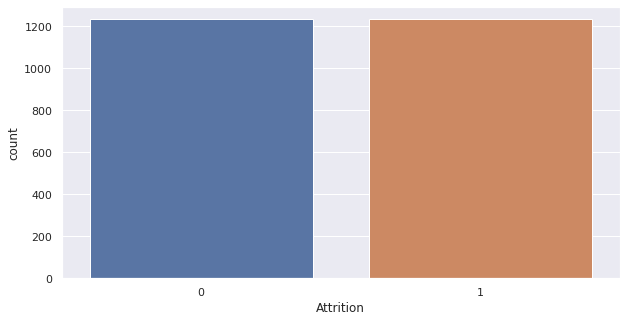

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X, y)

sns.countplot(x=y_sm)
plt.show()

##**Feature Selection**

### **Correlation using Spearman**

In [ ]:
def display_spearman_correlation(df):
    r = df_clean.drop(["Attrition"], axis=1).corrwith(df_clean["Attrition"], method="spearman")
    plt.figure(figsize=(50,1))
    heatmap = sns.heatmap([r], vmin=-1, vmax=1, annot=True, xticklabels=r.index, yticklabels=['Attrition'])
    plt.title("Spearman Correlation")
    return(r)

def display_correlation(df):
    r = df.corr(method="spearman")
    plt.figure(figsize=(50,50))
    heatmap = sns.heatmap(df.corr(), vmin=-1, 
                      vmax=1, annot=True)
    plt.title("Spearman Correlation")
    return(r)

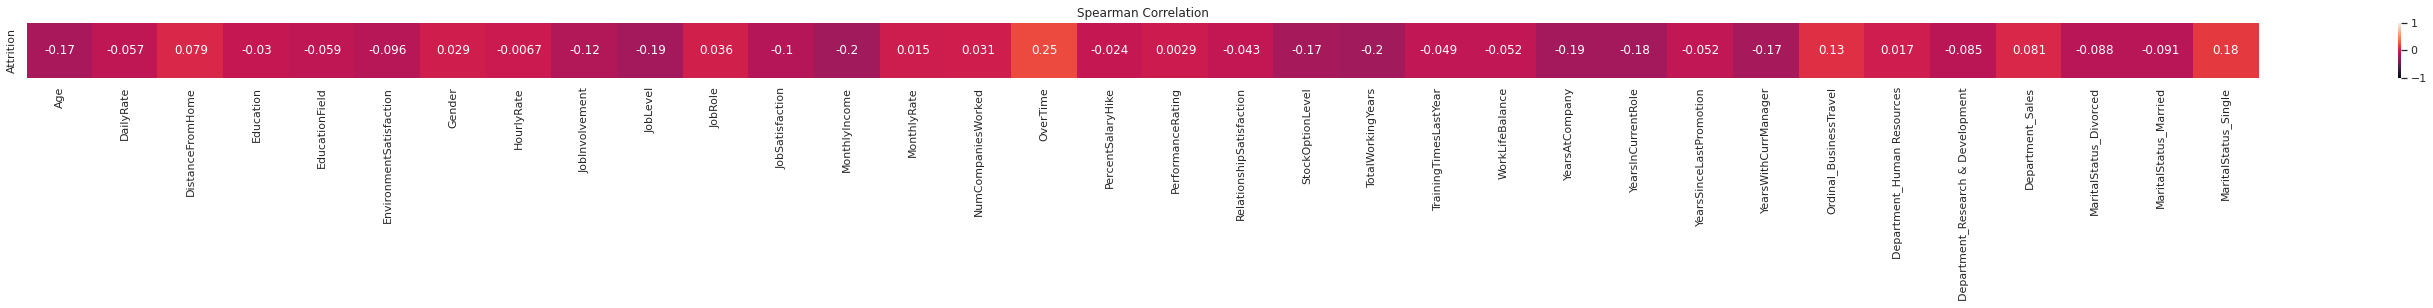

In [ ]:
_ = display_spearman_correlation(df_clean)

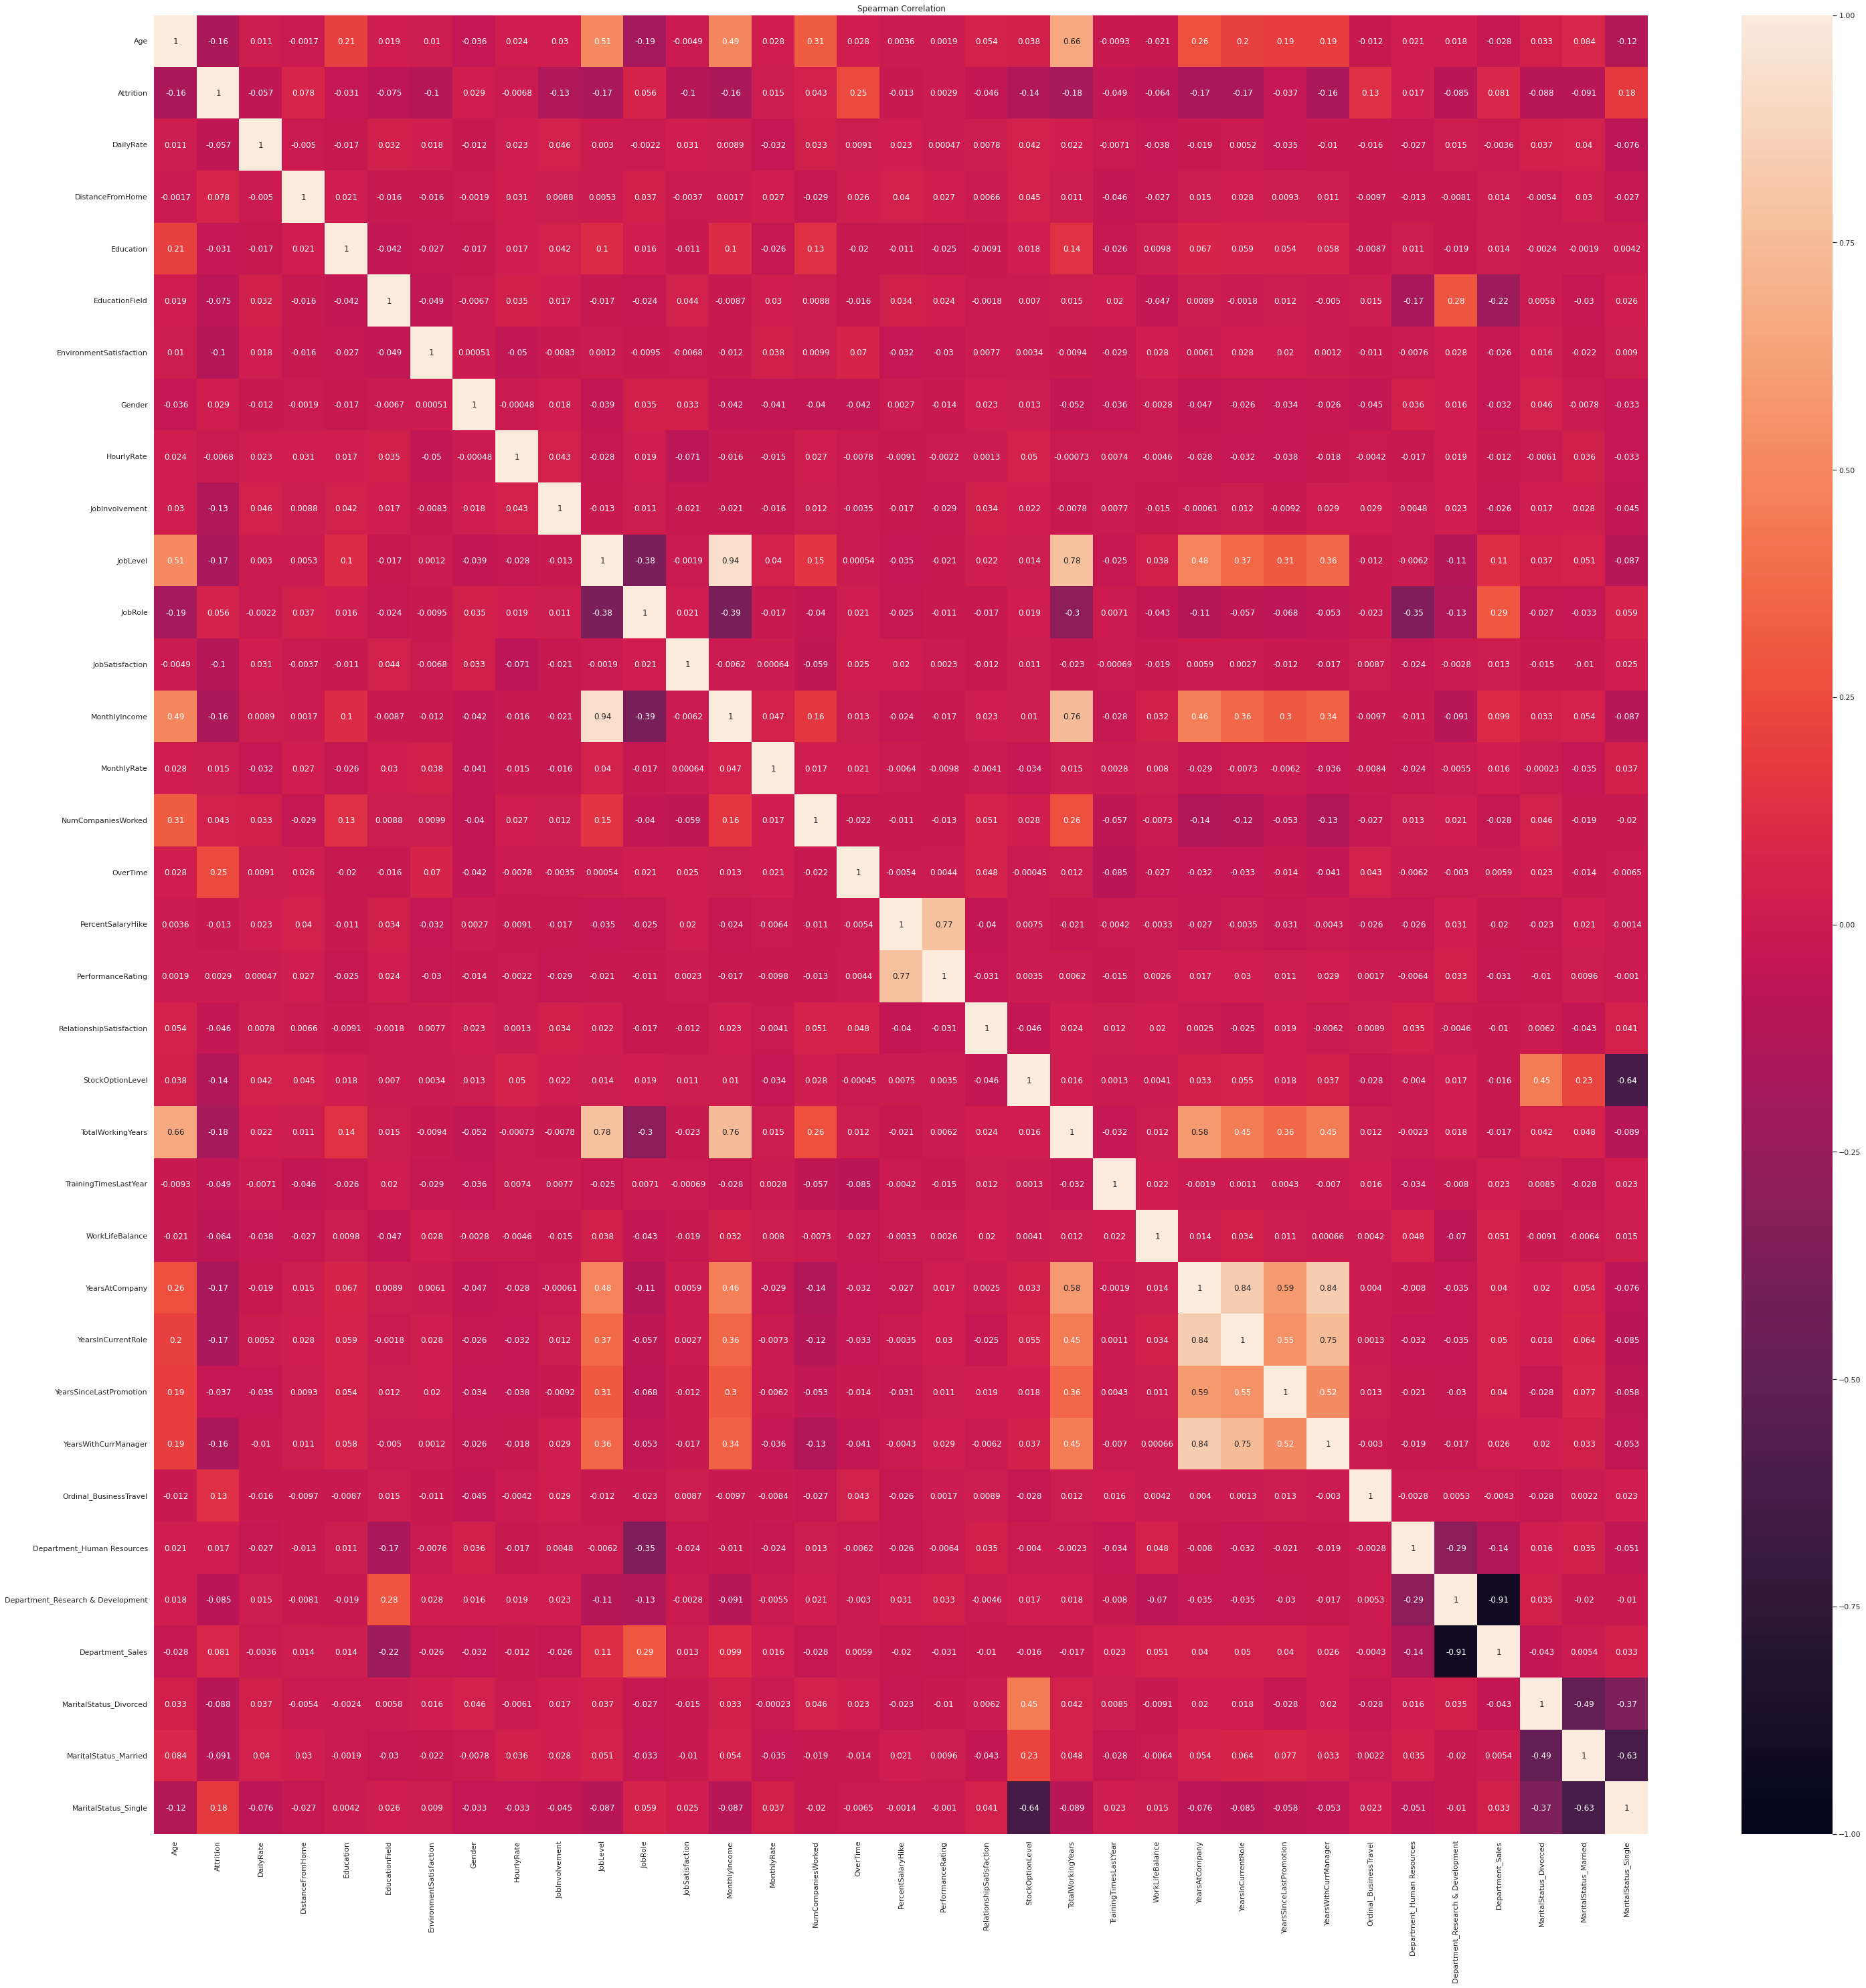

In [ ]:
_ = display_correlation(df_clean)

### **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#### **without SMOTE**

แบ่ง Train ไว้ที่ 75% ส่วนอีก 25% เก็บไว้เพื่อทดสอบโมเดล

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

ทำการ Train โมเดล จากนั้นประเมินประสิทธิภาพของโมเดล โดยแบ่งชุดข้อมูลออกเป็น 10 ส่วน

In [ ]:
forest = RandomForestClassifier(oob_score=True, random_state=42).fit(X_train,y_train)

score = cross_val_score(forest, X, y, cv=10)
print("cv iteration" , len(score))
print("Mean acc : {:.2f}".format(score.mean()))

cv iteration 10
Mean acc : 0.86


แสดงผล Classification Report

In [ ]:
print(classification_report(y_test, forest.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       320
           1       0.57      0.08      0.15        48

    accuracy                           0.87       368
   macro avg       0.72      0.54      0.54       368
weighted avg       0.84      0.87      0.83       368



In [ ]:
X_test_forest = X_test.copy()

#### **with SMOTE**

แบ่ง Train ไว้ที่ 75% ส่วนอีก 25% เก็บไว้เพื่อทดสอบโมเดล ที่ได้จากการทำ SMOTE

In [ ]:
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size=0.25, random_state=42)

ทำการ Train โมเดล จากนั้นประเมินประสิทธิภาพของโมเดล โดยแบ่งชุดข้อมูลออกเป็น 10 ส่วน

In [ ]:
forest_sm = RandomForestClassifier(oob_score=True, random_state=42).fit(X_train_sm,y_train_sm)

score = cross_val_score(forest_sm, X_sm, y_sm, cv=10)
print("cv iteration" , len(score))
print("Mean acc : {:.2f}".format(score.mean()))

cv iteration 10
Mean acc : 0.92


แสดงผล Classification Report หลังจากทำ SMOTE

In [ ]:
print(classification_report(y_test_sm, forest_sm.predict(X_test_sm)))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       311
           1       0.94      0.89      0.91       306

    accuracy                           0.92       617
   macro avg       0.92      0.92      0.92       617
weighted avg       0.92      0.92      0.92       617



In [ ]:
X_test_sm_forest = X_test_sm.copy()

สร้างกราฟ ROC เพื่อเปรียบเทียบโมเดล Random Forest ทั้ง 2 แบบ

In [ ]:
prob_ori = forest.predict_proba(X_test_forest)[:, 1]
prob_sm = forest_sm.predict_proba(X_test_sm_forest)[:, 1]

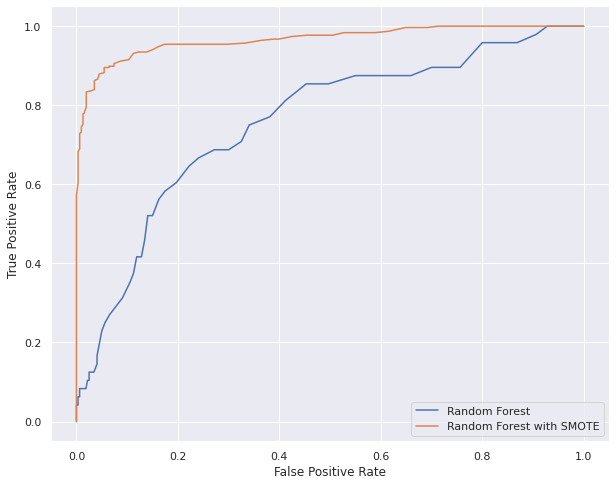

In [ ]:
plt.figure(figsize=(10,8))
ori_fpr, ori_tpr, _ = roc_curve(y_test, prob_ori)
sm_fpr, sm_tpr, _ = roc_curve(y_test_sm, prob_sm)

plt.plot(ori_fpr, ori_tpr, label="Random Forest")
plt.plot(sm_fpr, sm_tpr, label="Random Forest with SMOTE")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
forest_pred = forest.predict(X_test_forest)
forest_sm_pred = forest.predict(X_test_sm_forest)

print("f1-score Random Forest : %.4f"%(f1_score(y_test, forest_pred, average='macro')))
print("f1-score Random Forest with SMOTE : %.4f"%(f1_score(y_test_sm, forest_sm_pred, average='macro')))

f1-score Random Forest : 0.5382
f1-score Random Forest with SMOTE : 0.6169


แสดงกราฟของค่า Feature Importances หลังจากทำ SMOTE

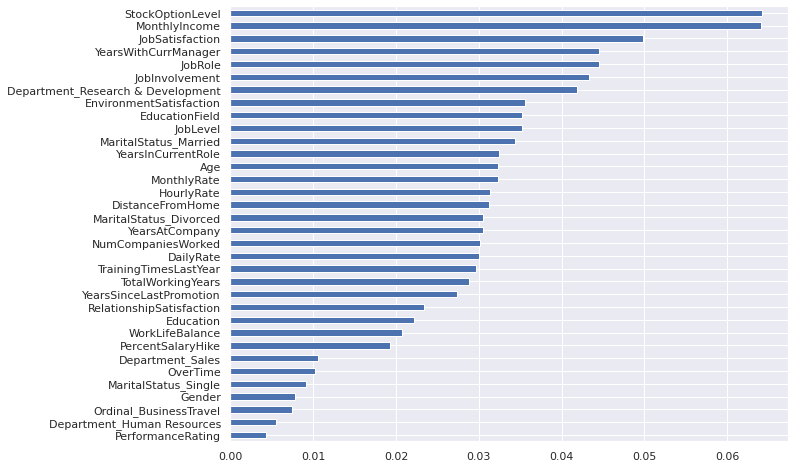

In [ ]:
plt.figure(figsize=(10,8))
feat_importances = pd.Series(forest_sm.feature_importances_, index=X.columns).sort_values()
feat_importances.plot(kind='barh')
plt.show()

แสดง 5 Feature หลังที่มีค่า Feature Importances มากที่สุด

In [ ]:
importances = feat_importances.sort_values(ascending=False)[:5]
importances

StockOptionLevel        0.064193
MonthlyIncome           0.064129
JobSatisfaction         0.049865
YearsWithCurrManager    0.044520
JobRole                 0.044463
dtype: float64

In [ ]:
X_im, X_im_sm = X[importances.index], X_sm[importances.index]

In [ ]:
X_im

,StockOptionLevel,MonthlyIncome,JobSatisfaction,YearsWithCurrManager,JobRole
0,0,5993.0,4,5.0,326
1,1,5130.0,2,7.0,292
2,0,2317.6,3,0.0,259
3,0,2909.0,3,0.0,292
4,1,3468.0,2,2.0,259
...,...,...,...,...,...
1465,1,2571.0,4,3.0,259
1466,1,9991.0,1,7.0,131
1467,1,6142.0,2,3.0,145
1468,0,5390.0,2,8.0,326


#**Data Processing**

##**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


###**Without SMOTE**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_im, y, test_size=0.25, random_state=42)

เนื่องจากข้อมูลทั้งหมดเป็น continueous data จึงจำเป็นต้อง scaling ข้อมูลเพื่อที่จะให้ข้อมูลอยู่จุดศูนย์กลาง และ Logistic Regression จำเป็นต้อง scaling ข้อมูลก่อนเพราะว่ามัน sensitive กับข้อมูลมากๆ

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

ทำการ Train โมเดล แล้วแสดงผล Classification Report

In [ ]:
logreg = LogisticRegression().fit(X_train_scale, y_train)
print(classification_report(y_test, logreg.predict(X_test_scale)))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       320
           1       0.00      0.00      0.00        48

    accuracy                           0.87       368
   macro avg       0.43      0.50      0.47       368
weighted avg       0.76      0.87      0.81       368



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###**With SMOTE**

แบ่ง Train ไว้ที่ 75% ส่วนอีก 25% เก็บไว้เพื่อทดสอบโมเดล ที่ได้จากการทำ SMOTE จากนั้นนำมา scaling ข้อมูล

In [ ]:
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_im_sm, y_sm, test_size=0.25, random_state=42)

scaler_sm = StandardScaler()
scaler_sm.fit(X_train_sm)
X_train_sm_scale = scaler_sm.transform(X_train_sm)
X_test_sm_scale = scaler_sm.transform(X_test_sm)

ทำการ Train โมเดล โดยเพิ่มพารามิเตอร์ `penalty = 'l1'` และ `solver='liblinear'` แล้วแสดงผล Classification Report

In [ ]:
logreg_sm = LogisticRegression(penalty = 'l1',solver='liblinear').fit(X_train_sm_scale, y_train_sm)
print(classification_report(y_test_sm, logreg_sm.predict(X_test_sm_scale)))

              precision    recall  f1-score   support

           0       0.72      0.67      0.70       311
           1       0.69      0.74      0.71       306

    accuracy                           0.70       617
   macro avg       0.70      0.70      0.70       617
weighted avg       0.70      0.70      0.70       617



ประเมินประสิทธิภาพของโมเดล หลังจากทำ SMOTE โดยแบ่งชุดข้อมูลออกเป็น 10 ส่วน

In [ ]:
score = cross_val_score(logreg_sm, X_im_sm, y_sm, cv=10)
print("cv iteration" , len(score))
print("Mean acc : {:.2f}".format(score.mean()))

cv iteration 10
Mean acc : 0.72


## **Model Result & Interpretion**

### **Logistic Regression**

สร้างกราฟ ROC เพื่อเปรียบเทียบโมเดล Logistic Regression ทั้ง 2 แบบ

In [ ]:
prob_ori = logreg.predict_proba(X_test_scale)[:, 1]
prob_sm = logreg_sm.predict_proba(X_test_sm_scale)[:, 1]

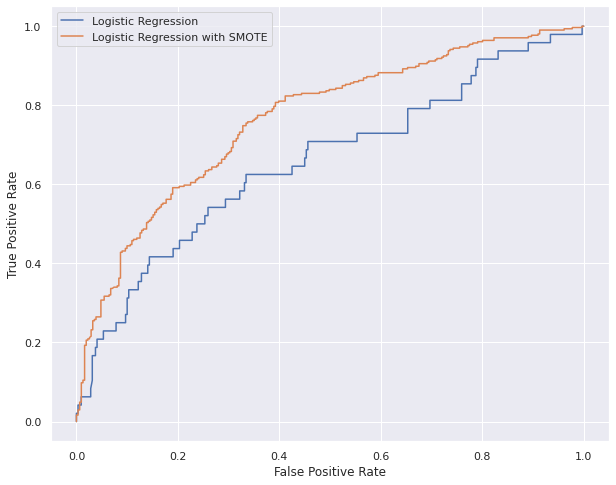

In [ ]:
plt.figure(figsize=(10,8))
ori_fpr, ori_tpr, _ = roc_curve(y_test, prob_ori)
sm_fpr, sm_tpr, _ = roc_curve(y_test_sm, prob_sm)

plt.plot(ori_fpr, ori_tpr, label="Logistic Regression")
plt.plot(sm_fpr, sm_tpr, label="Logistic Regression with SMOTE")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

สร้างตาราง coefficient และ ค่า p-value (P>|z|)

In [ ]:
X_summary = pd.DataFrame(X_train_sm_scale, columns=X_im_sm.columns)
y_summary = np.array(y_train_sm).reshape(-1,1)

In [ ]:
model = sm.Logit(endog=y_summary, exog=X_summary).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.556112
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1849
Model:                          Logit   Df Residuals:                     1844
Method:                           MLE   Df Model:                            4
Date:                Thu, 28 Apr 2022   Pseudo R-squ.:                  0.1977
Time:                        08:08:25   Log-Likelihood:                -1028.3
converged:                       True   LL-Null:                       -1281.6
Covariance Type:            nonrobust   LLR p-value:                2.333e-108
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
StockOptionLevel        -0.7553      0.061    -12.370      0.000      -0.875      -0.636

In [ ]:
print("Coefficient : ", logreg_sm.coef_)
print("Intercept : ", logreg_sm.intercept_)

Coefficient :  [[-0.75759274 -0.36035437 -0.57342441 -0.35820456  0.13388328]]
Intercept :  [-0.04570519]


#**Data visualization**

การทำ visulization ส่วนที่เหลืออยู่ในไฟล์แนบครับ

# **Conclusion**

พนักงานที่ลาออกมักจะ...
* มีช่วงอายุ 30-40 ปี
* มีส่วนได้ส่วนเสียและผูกพันธ์กับบริษัทน้อย
* ต้องการเพิ่มความก้าวหน้าทางอาชีพ
* ไม่พึงพอใจกับงาน หรือเงินเดือนที่ได้รับ

# **รายชื่อสมาชิก**


1. นายณัฐนนท์ ราษฎร์บริรักษ์ 6209680799
2. นายสิรวิชญ์ คล้ายรัศมี 6209680831
3. นายณัทธร เชิงเชาว์ 6209610416
4. นายอธิป บุญยงค์ 6209680054